In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

In [13]:
import flax.linen as nn
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt

import numpy as np

In [4]:
class Generator(nn.Module):
    training = False

    @nn.compact
    def __call__(self, z):
        x = nn.ConvTranspose(features=64*8, kernel_size=(4, 4),
                             strides=(1, 1), padding='VALID', use_bias=False)(z)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=64*4, kernel_size=(4, 4),
                             strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=64*2, kernel_size=(4, 4),
                             strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=64, kernel_size=(
            4, 4), strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=1, kernel_size=(
            4, 4), strides=(1, 1), padding='SAME', use_bias=False)(x)
        return jnp.tanh(x)

In [36]:
class Generator2(nn.Module):
    training = False

    @nn.compact
    def __call__(self, z):
        x = nn.ConvTranspose(features=16*8, kernel_size=(4, 4),
                             strides=(1, 1), padding='VALID', use_bias=False)(z)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=16*4, kernel_size=(4, 4),
                             strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=16*2, kernel_size=(4, 4),
                             strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=16, kernel_size=(
            4, 4), strides=(2, 2), padding='SAME', use_bias=False)(x)
        x = nn.BatchNorm(
            use_running_average=not self.training, momentum=0.9)(x)
        x = nn.relu(x)

        x = nn.ConvTranspose(features=1, kernel_size=(
            4, 4), strides=(1, 1), padding='SAME', use_bias=False)(x)
        return jnp.tanh(x)

In [49]:
gen = Generator2()

In [50]:
z = jnp.ones((1, 1, 1, 10), jnp.float32)
key = jax.random.PRNGKey(0)

params = gen.init(key,z)

In [61]:
# z = jax.random.normal(key,(1, 1, 1, 10), jnp.float32)
z = np.zeros((1, 1, 1, 10), jnp.float32)
z[0,0,0,1] = 1
out = np.squeeze(gen.apply(params,z))

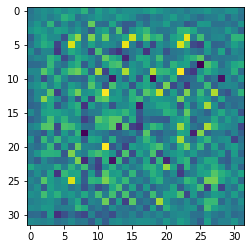

In [62]:
plt.imshow(out)

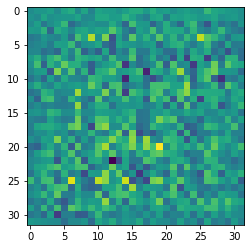

In [52]:
plt.imshow(out)

In [73]:
frames = []

z = np.array(jax.random.normal(key,(1, 1, 1, 10), jnp.float32))

for i in np.linspace(-5,5,100):
    
    z[0,0,0,1] = i
    out = np.squeeze(gen.apply(params,z))
    
    frames.append(out)

In [ ]:
HTML(frames_to_anim(frames).to_jshtml())

In [67]:
%matplotlib inline

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def frames_to_anim(frames):
    plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    plt.close()
    return anim